<a href="https://colab.research.google.com/github/Saul-Ochoa/Classification-ML/blob/main/MobilePhone/MobileClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Classification**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
import missingno as msno
import warnings
import shap
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
train='https://raw.githubusercontent.com/Saul-Ochoa/ClasificaciOn-de-PredicciOn-Salarial/main/MobilePhone/train.csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/ClasificaciOn-de-PredicciOn-Salarial/main/MobilePhone/test.csv'
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## **EDA**

In [ ]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
num=train.select_dtypes(include='number').columns
num

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df_num=train[num]
describeNum = df_num.describe()
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


<Axes: >

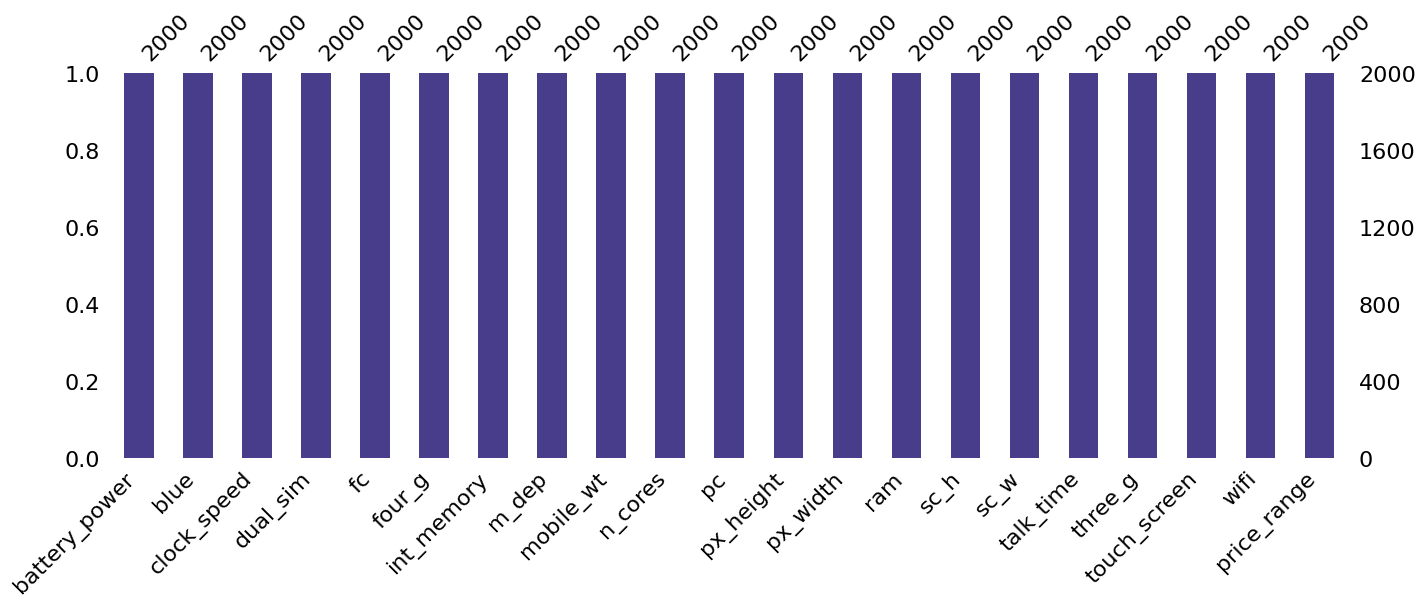

In [ ]:
msno.bar(df_num,figsize = (16,5),color = "#483D8B")

In [ ]:
for i in df_num.columns:
    unique_values=len(df_num[i].unique())
    print("{i} has {unique_values} unique values".format(i=i,unique_values=unique_values))

battery_power has 1094 unique values
blue has 2 unique values
clock_speed has 26 unique values
dual_sim has 2 unique values
fc has 20 unique values
four_g has 2 unique values
int_memory has 63 unique values
m_dep has 10 unique values
mobile_wt has 121 unique values
n_cores has 8 unique values
pc has 21 unique values
px_height has 1137 unique values
px_width has 1109 unique values
ram has 1562 unique values
sc_h has 15 unique values
sc_w has 19 unique values
talk_time has 19 unique values
three_g has 2 unique values
touch_screen has 2 unique values
wifi has 2 unique values
price_range has 4 unique values


In [ ]:
cat_features=list()
num_features=list()
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

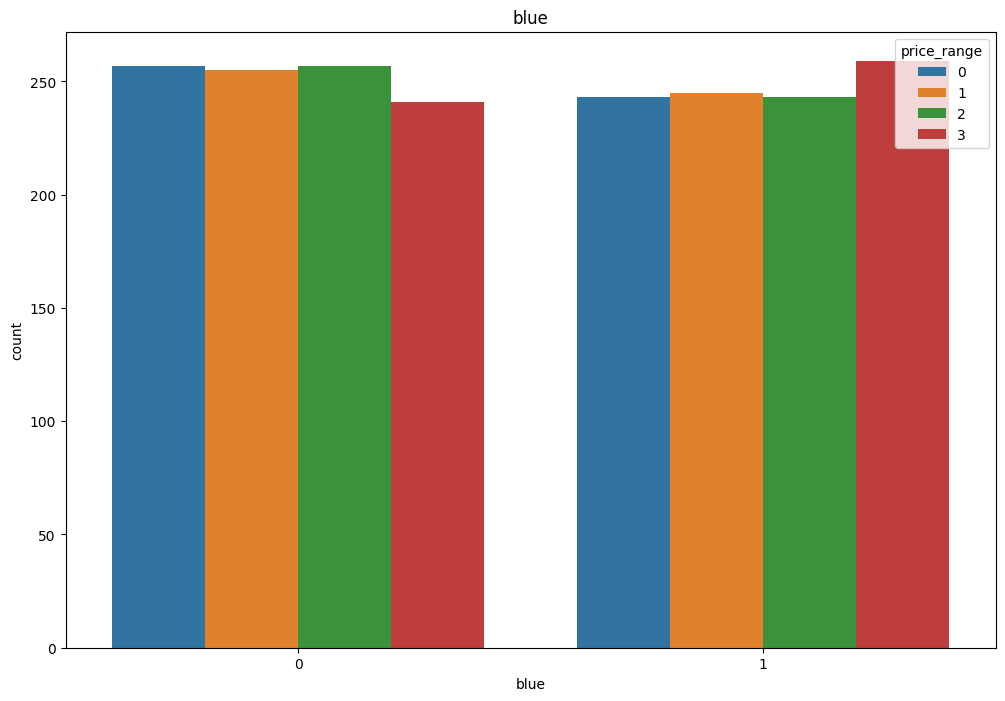

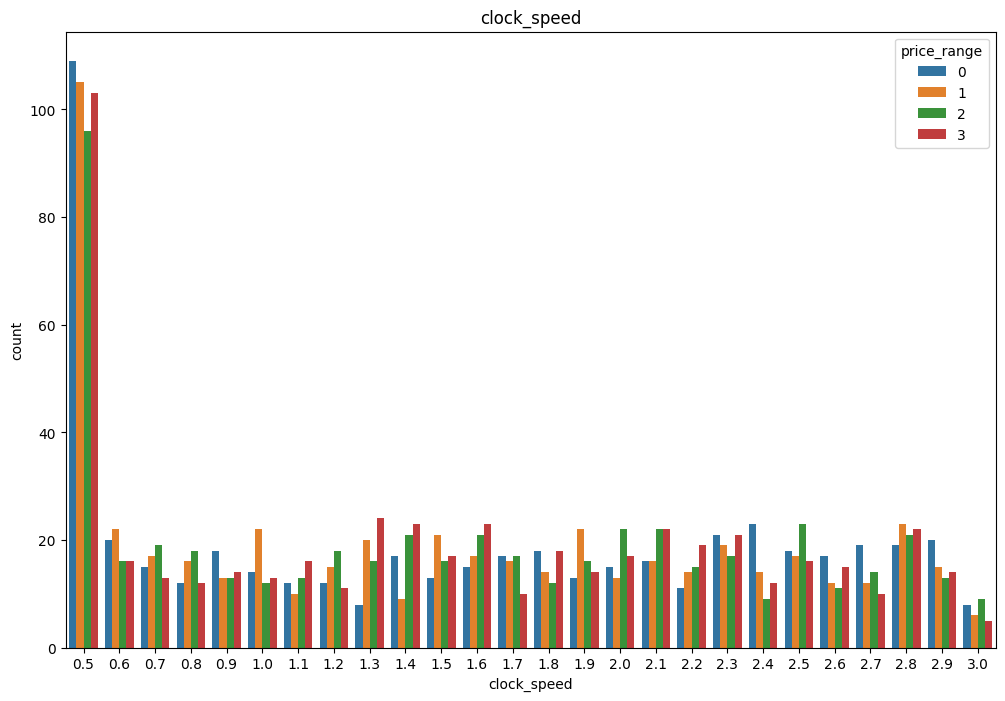

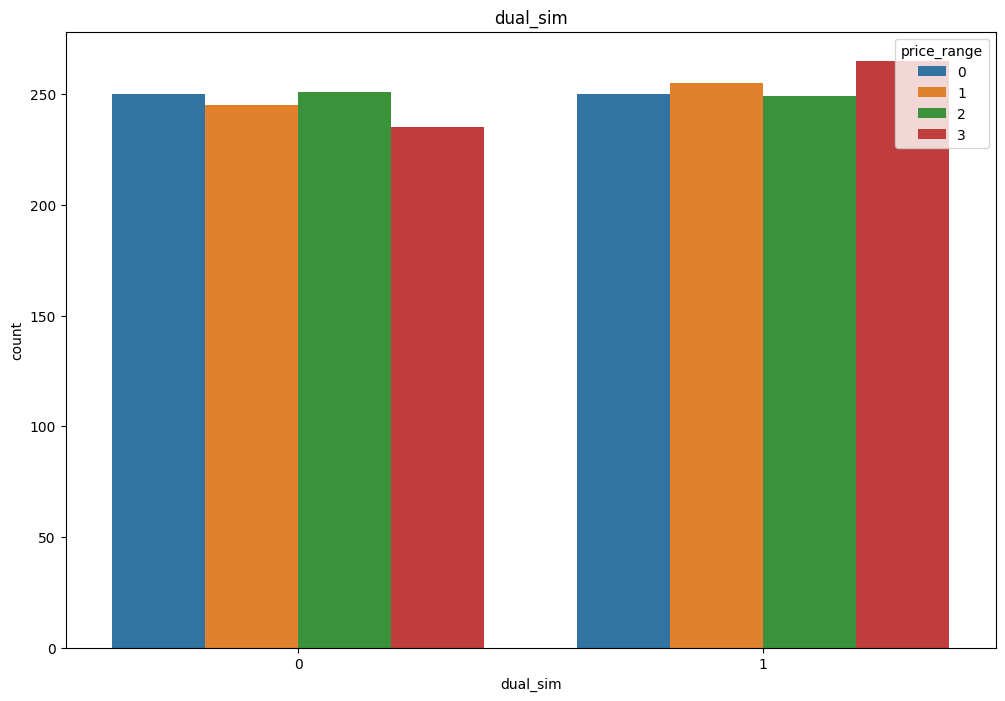

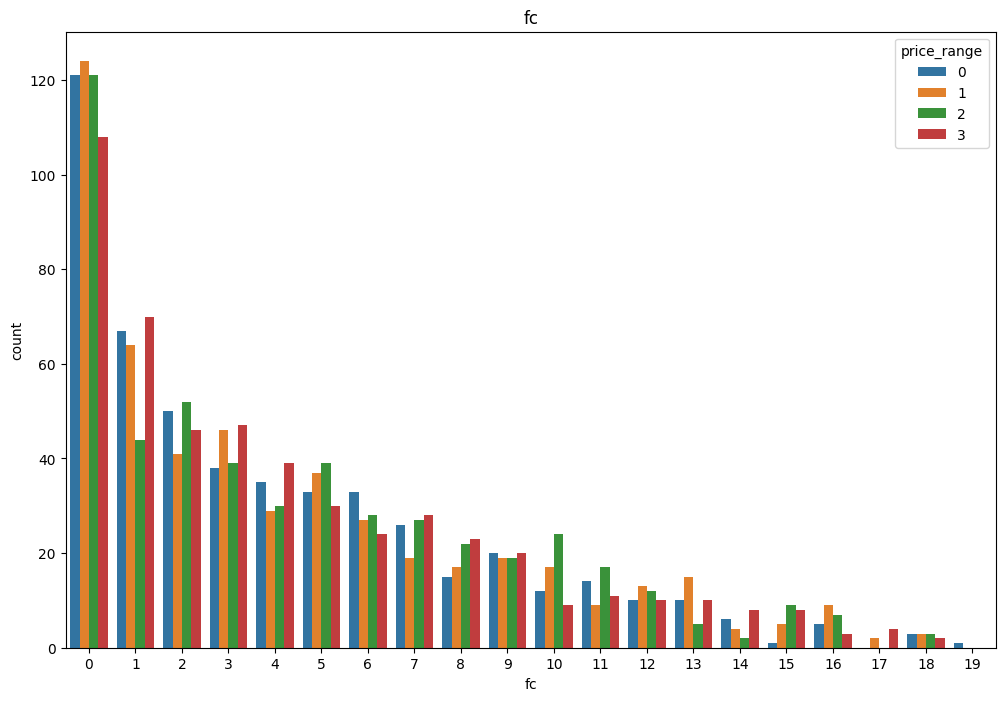

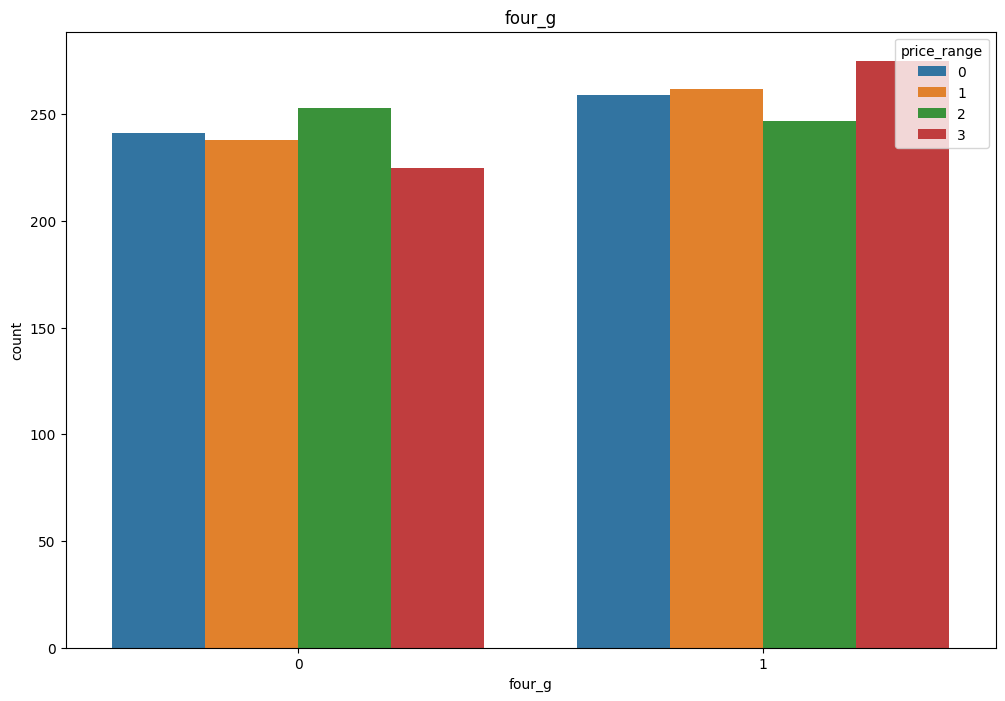

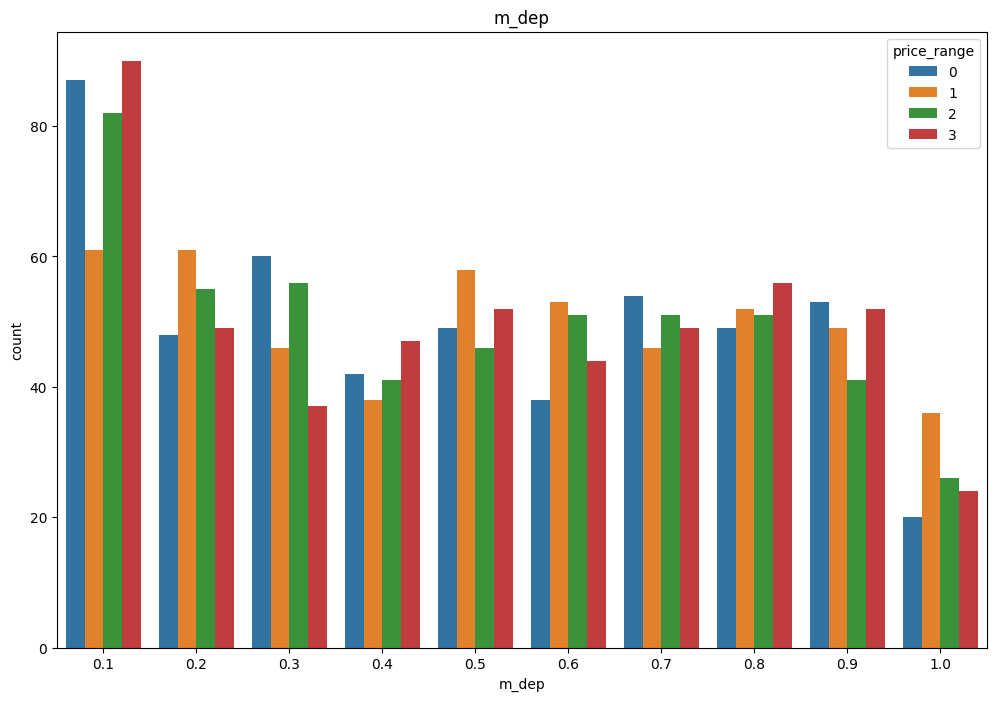

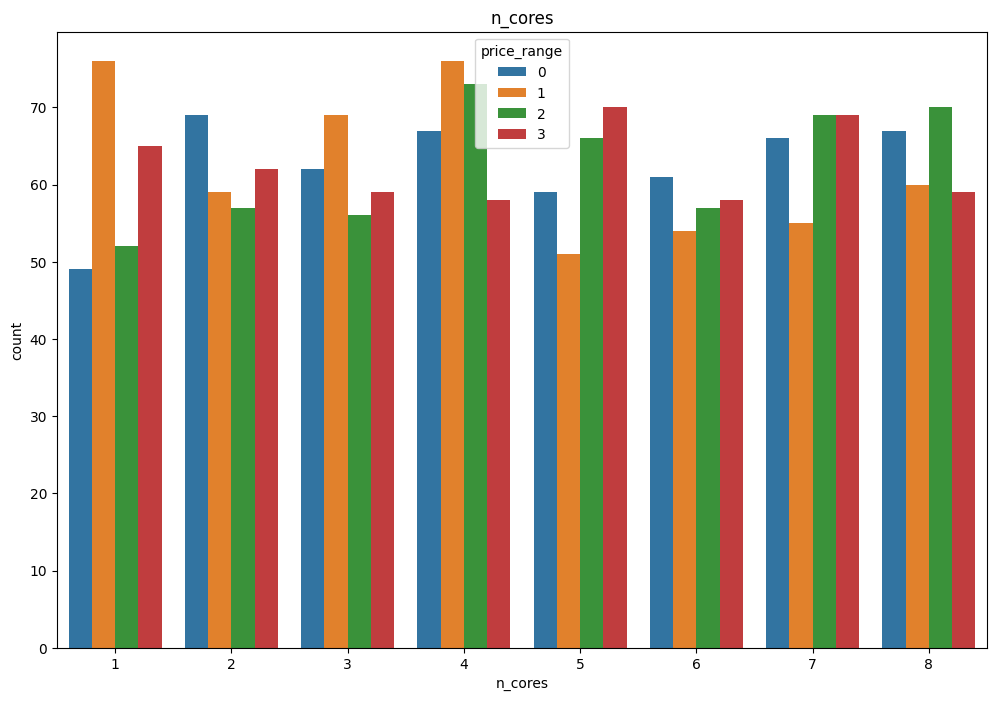

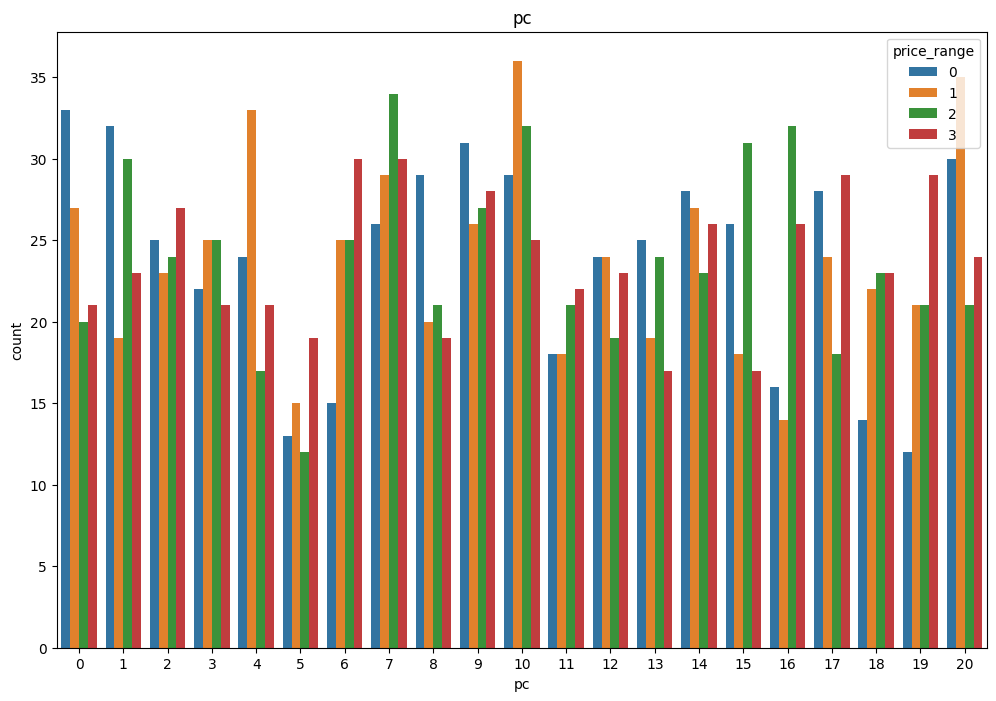

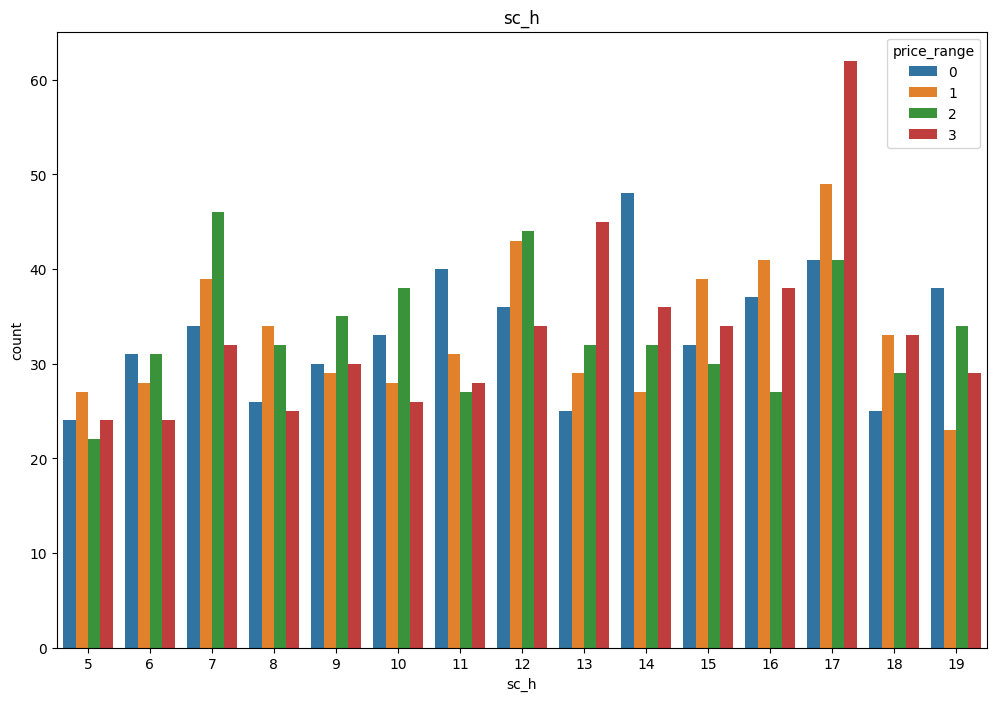

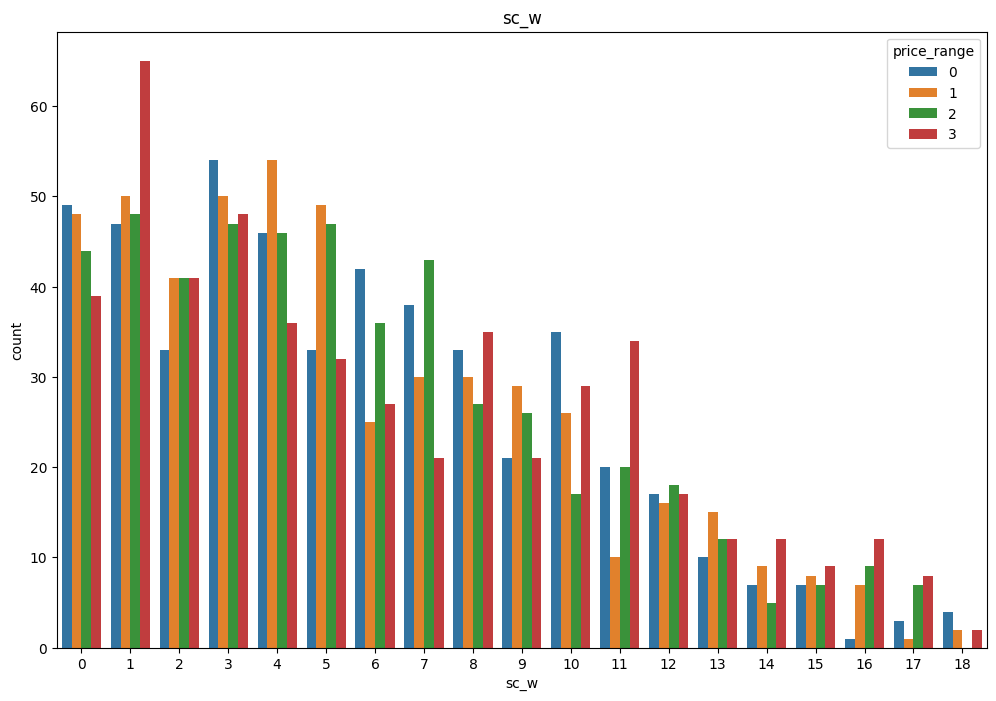

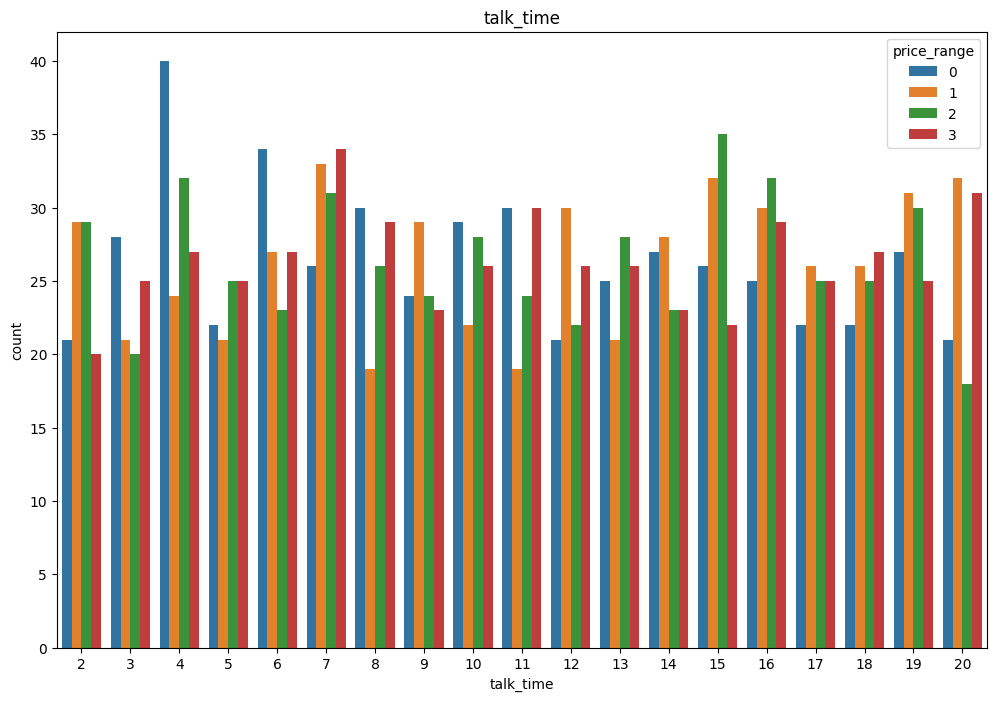

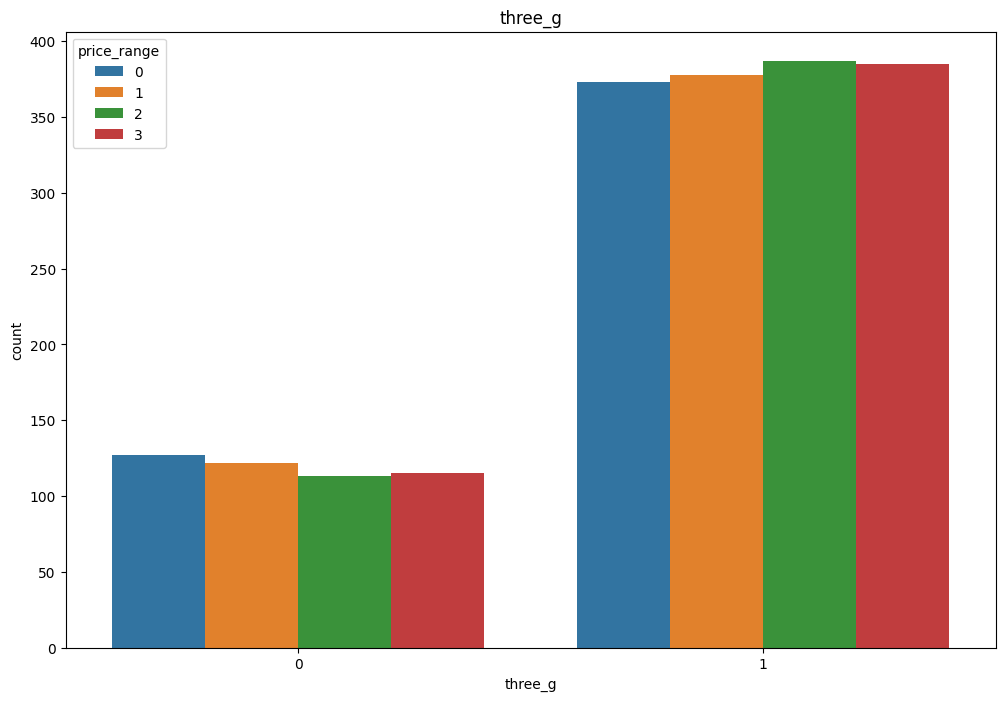

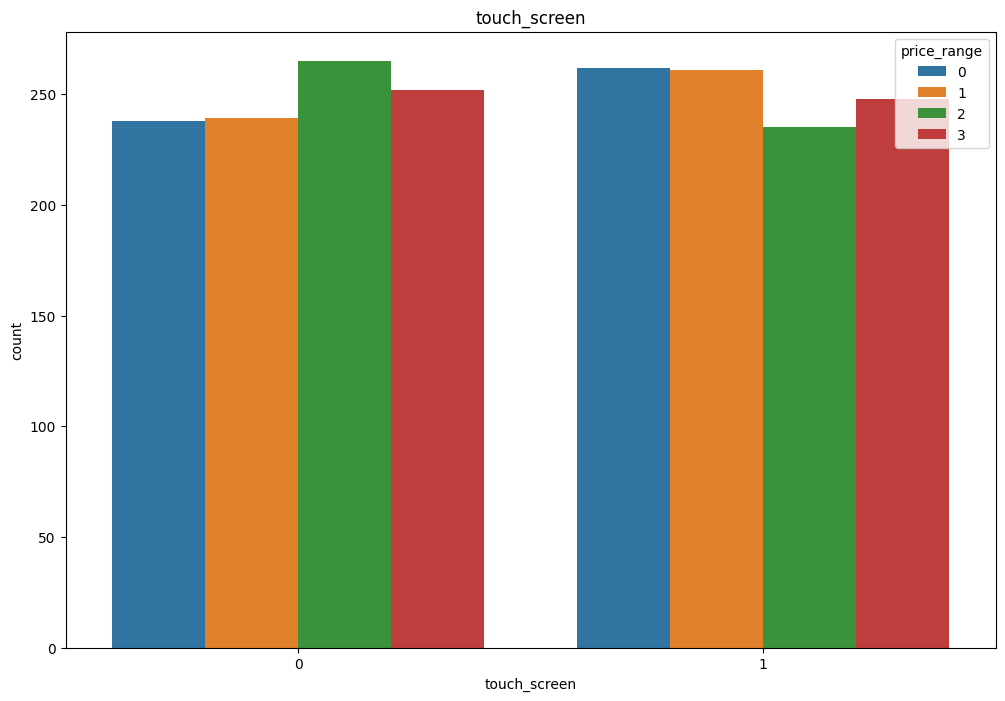

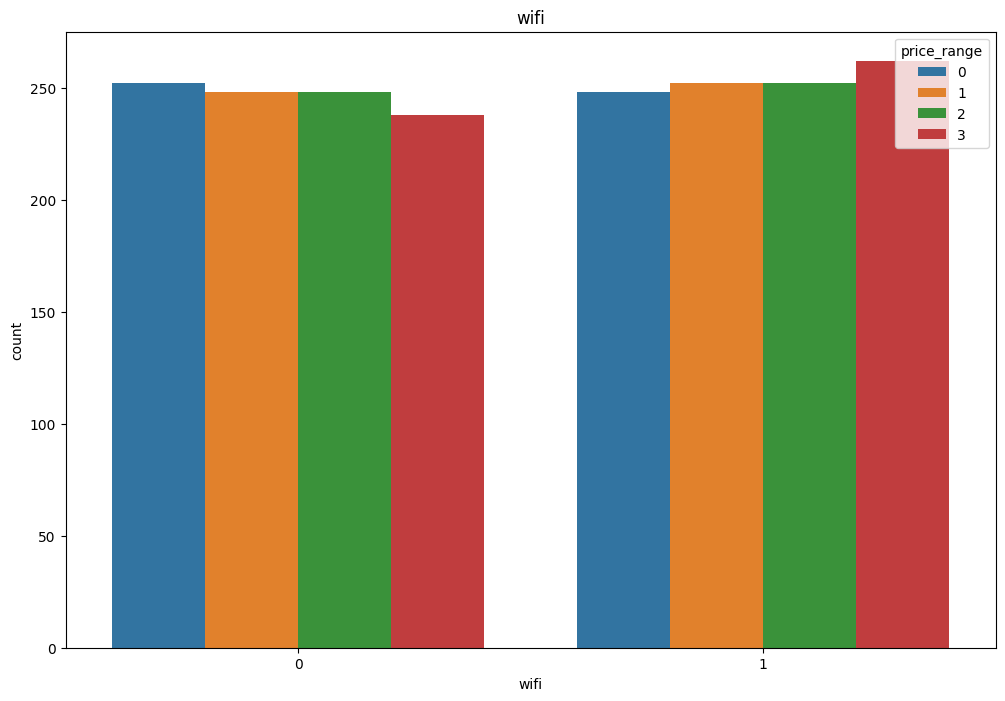

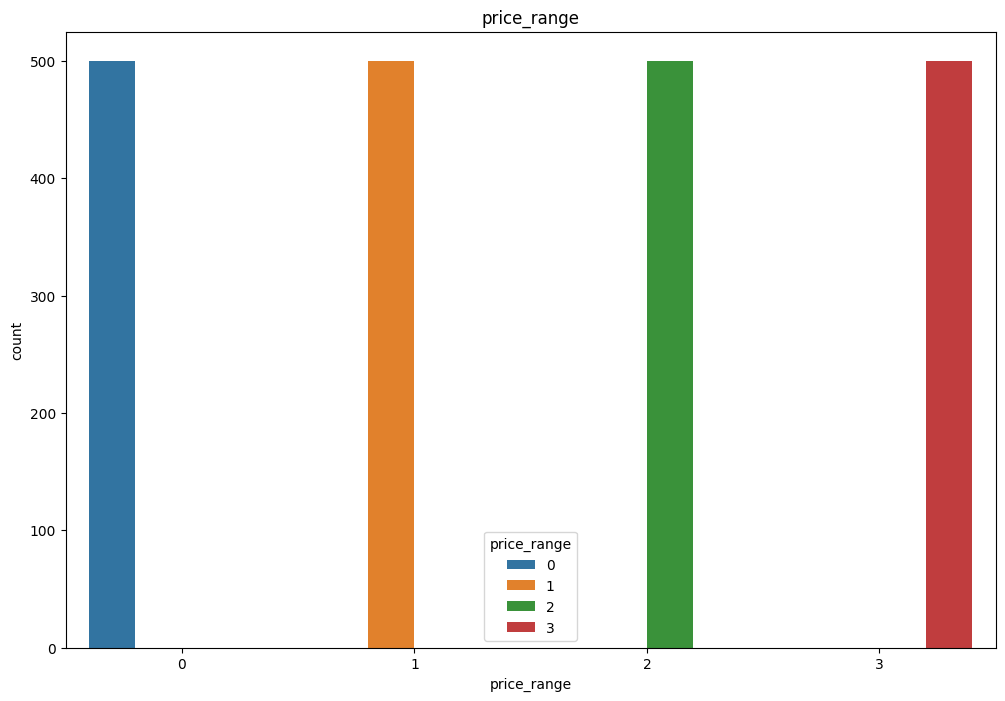

In [ ]:
train_cat=train[cat_features]

for i in train_cat.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i,data=train_cat,hue='price_range')
    plt.title(i)
    plt.show()

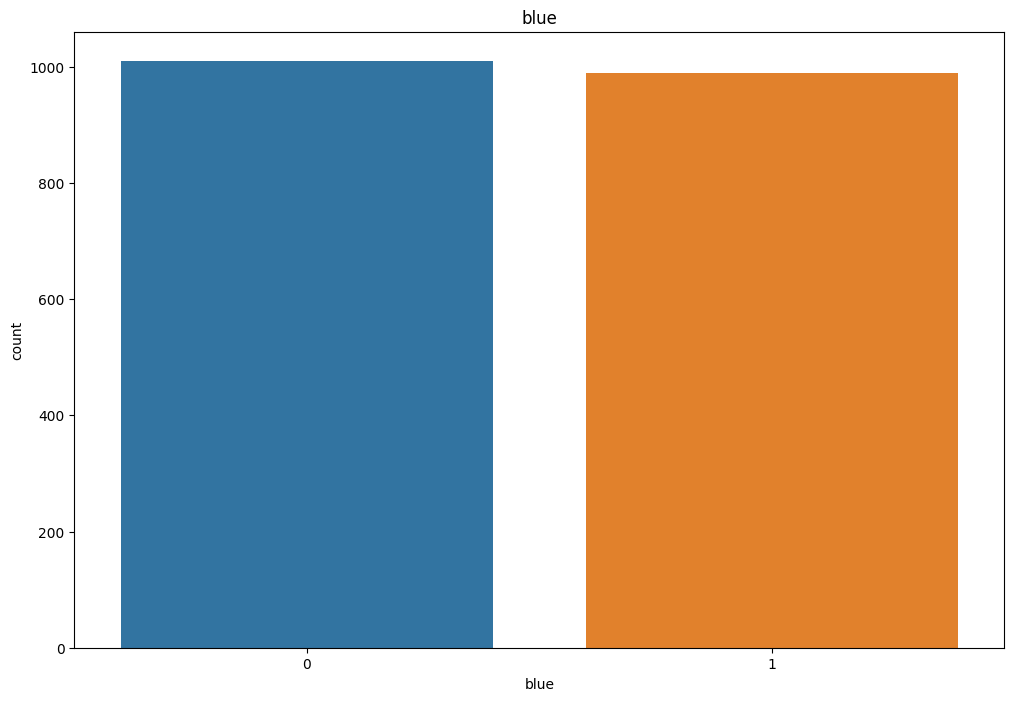

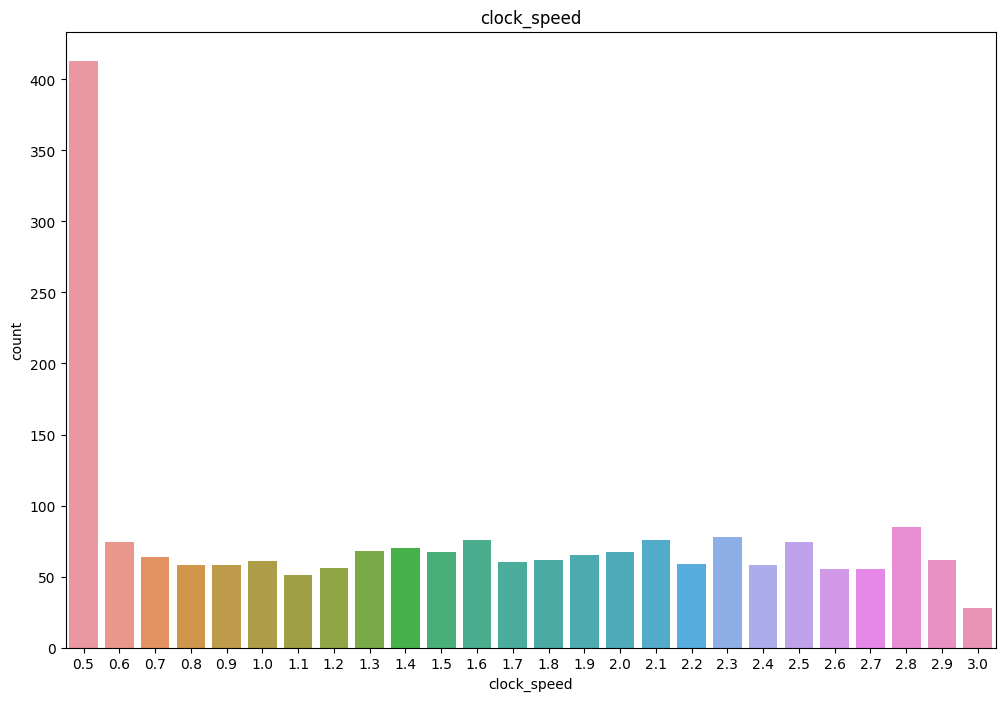

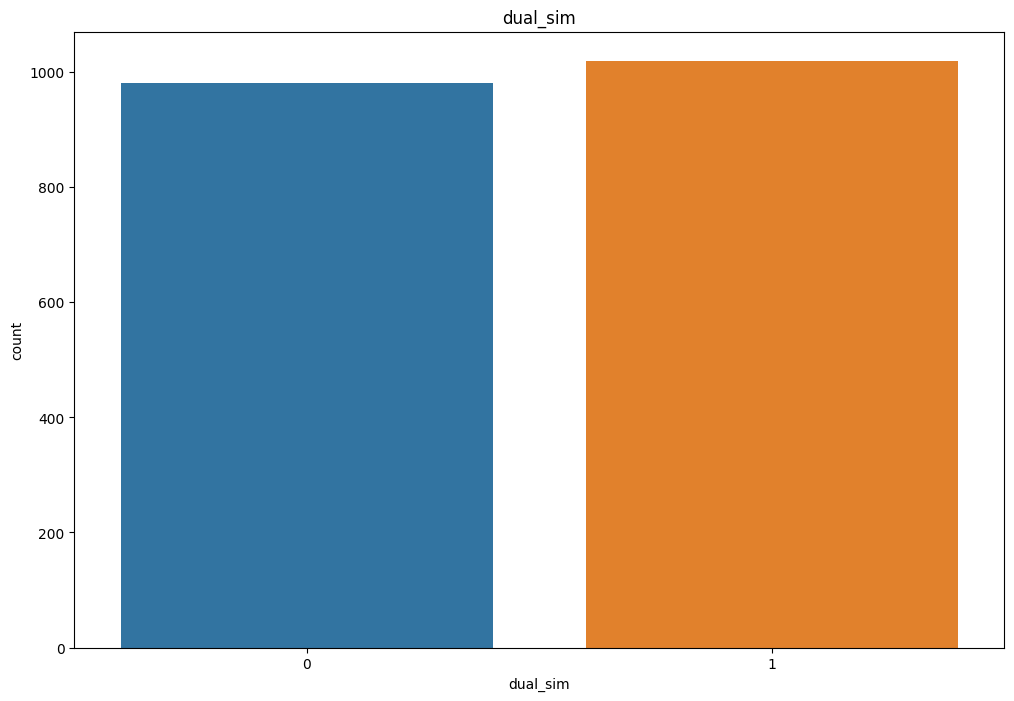

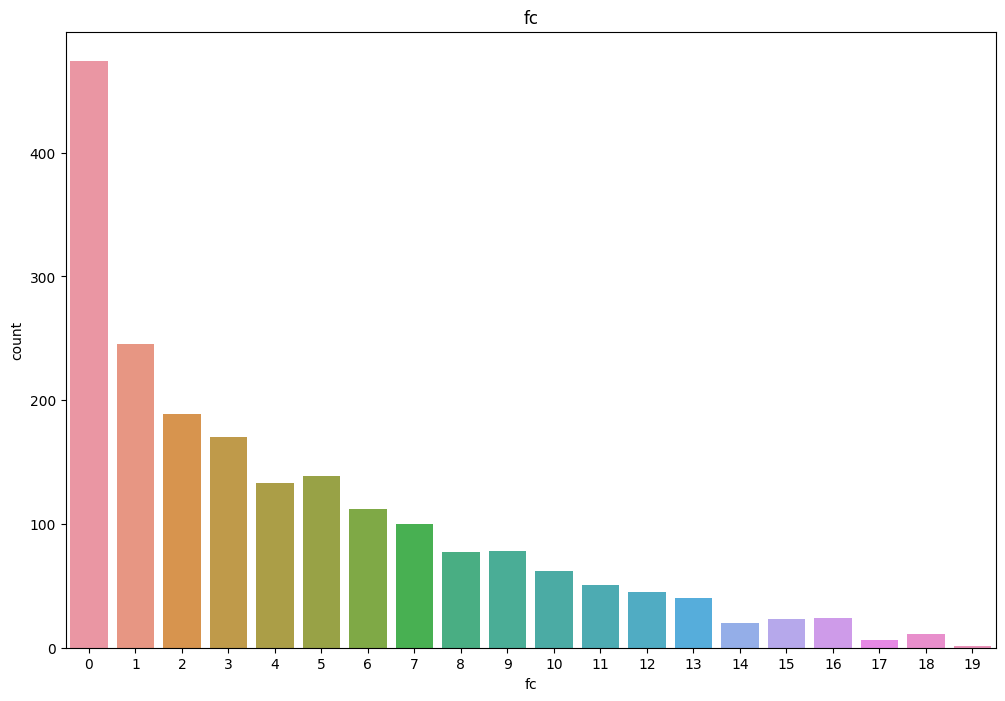

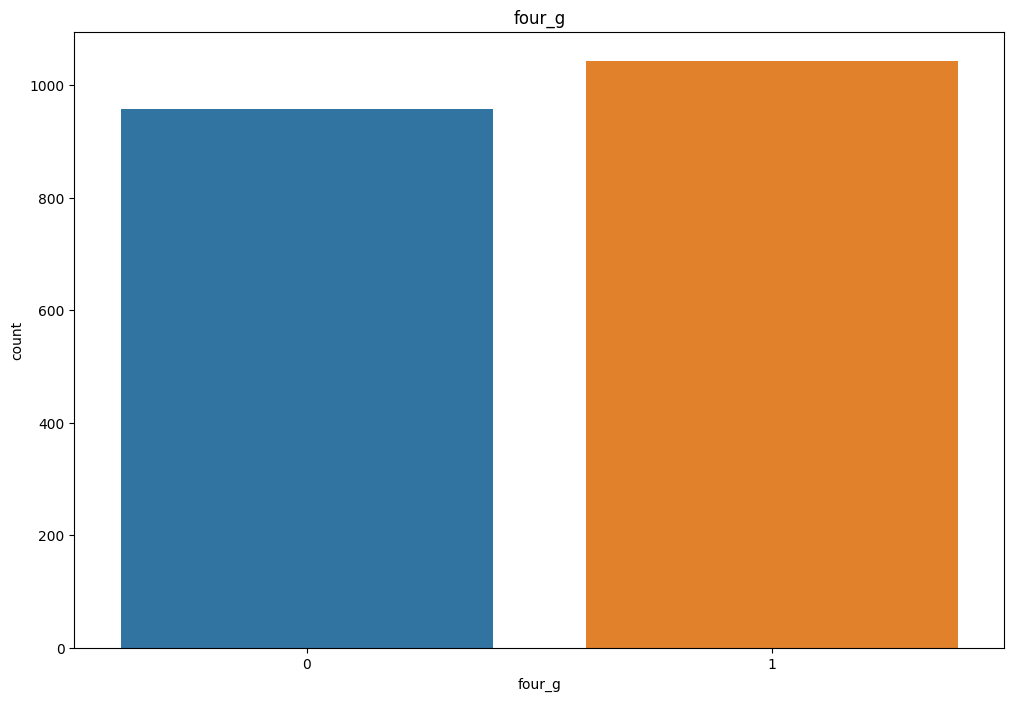

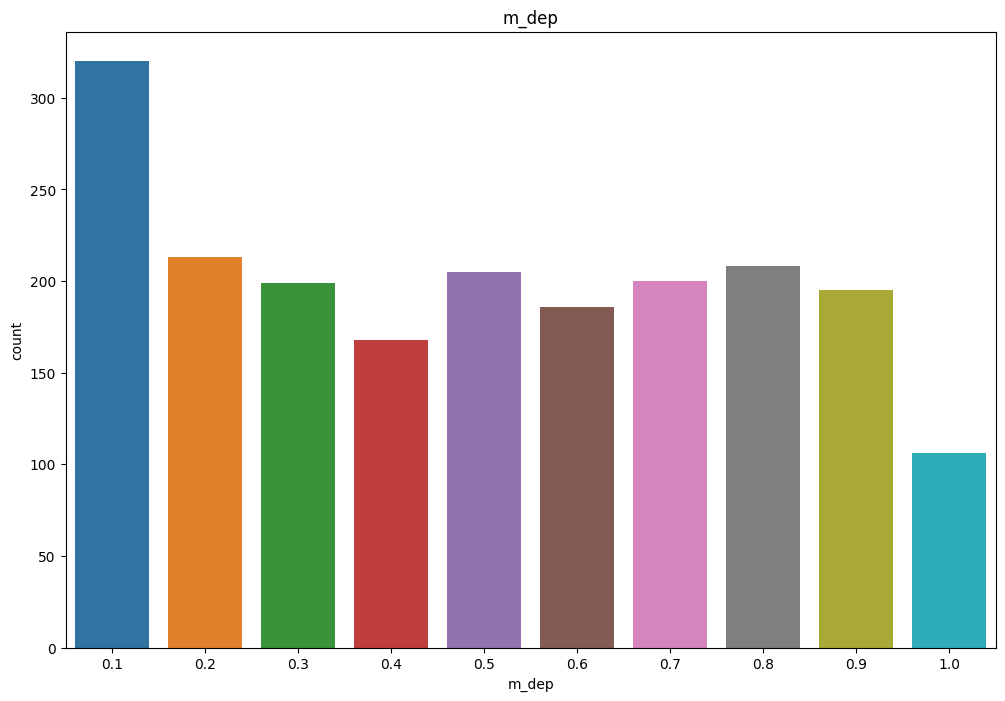

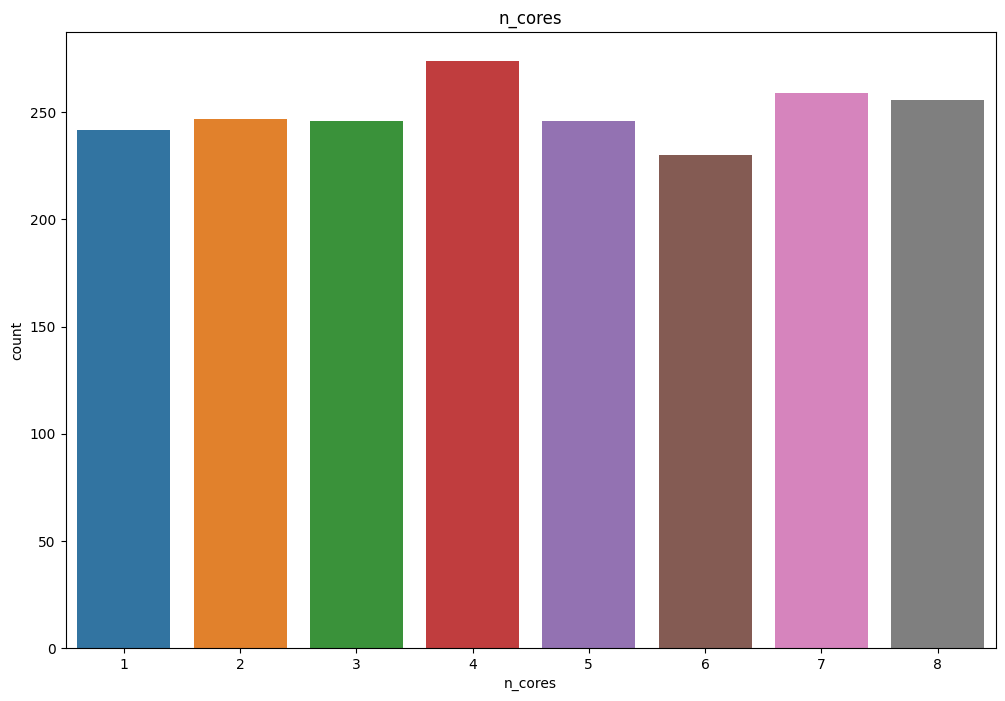

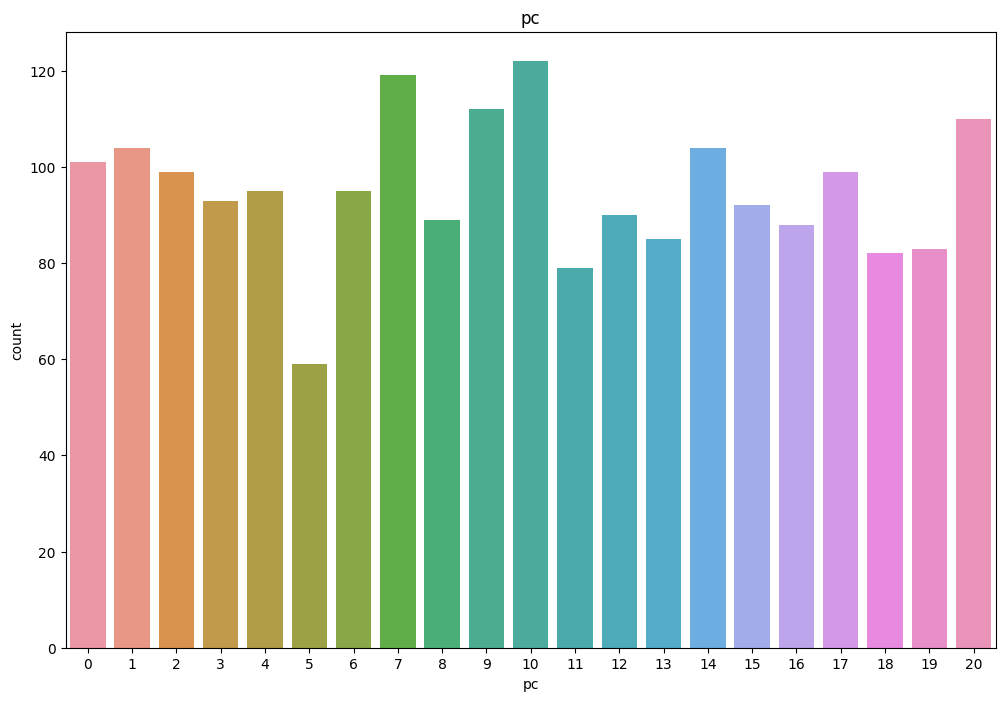

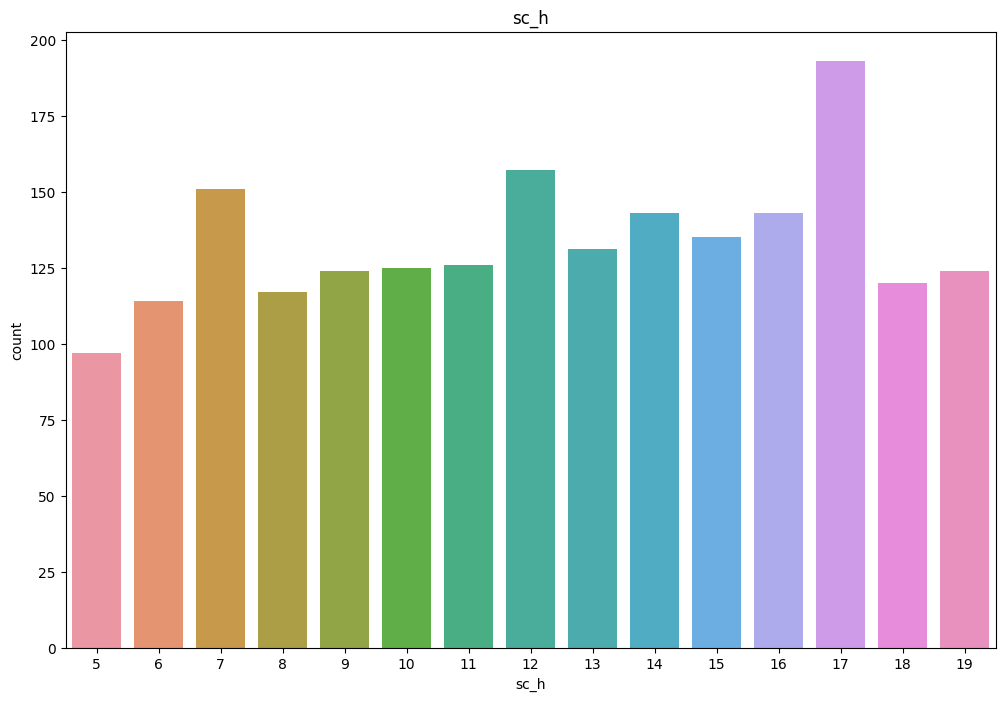

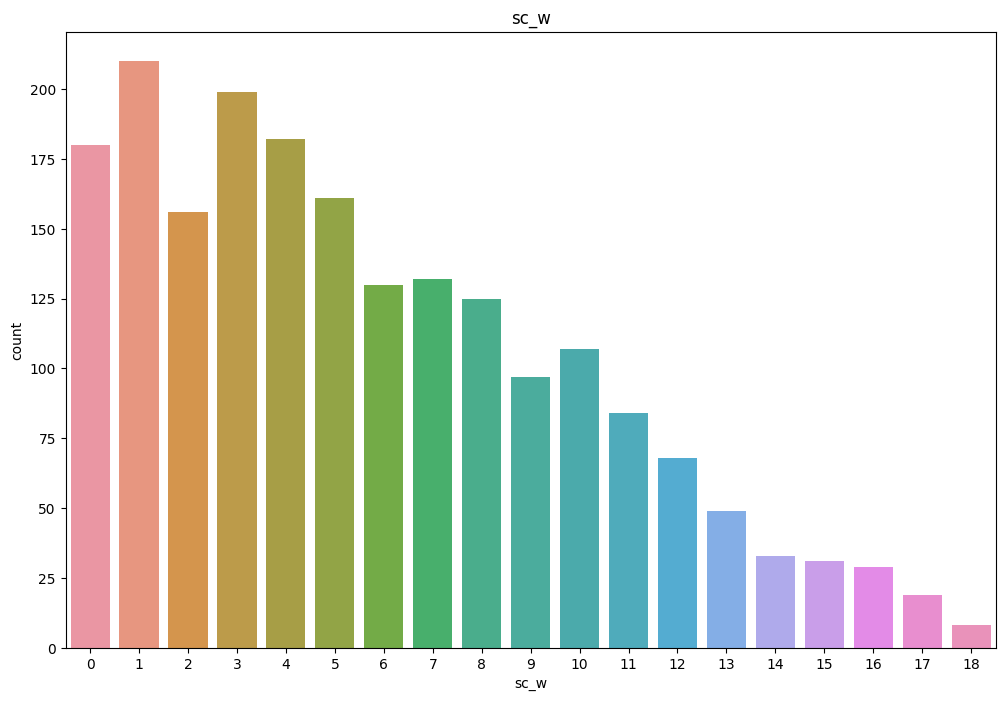

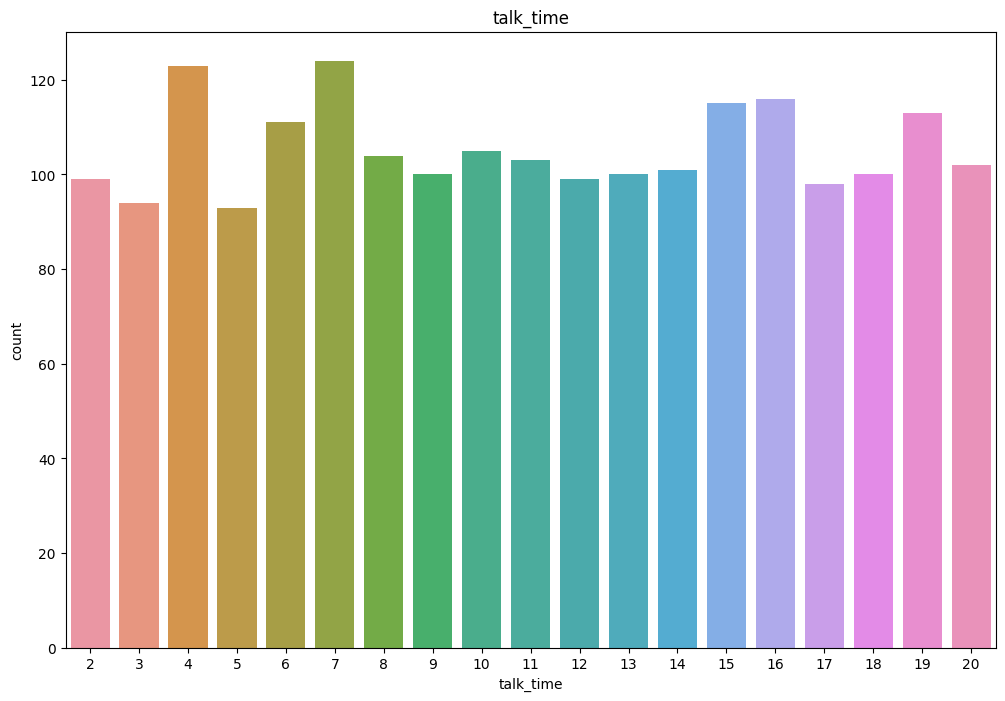

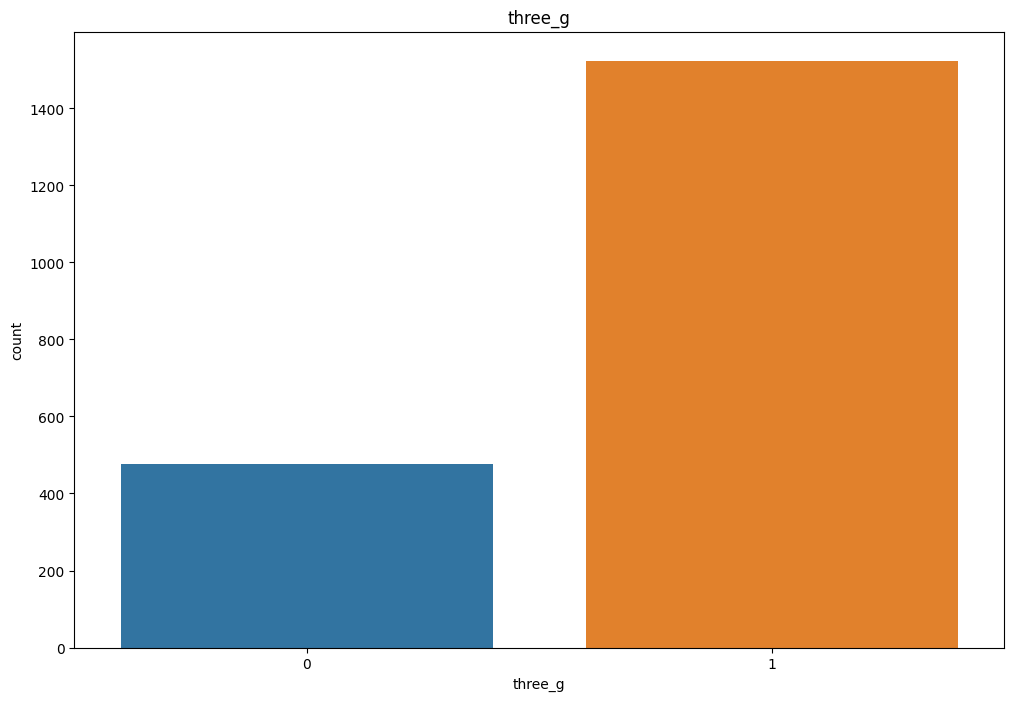

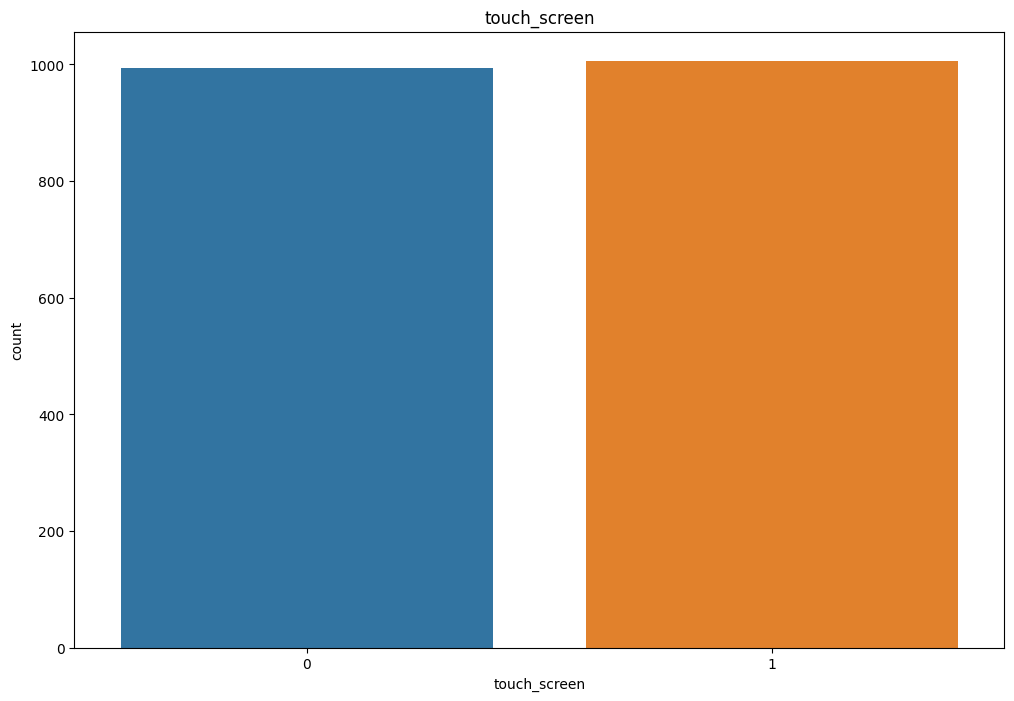

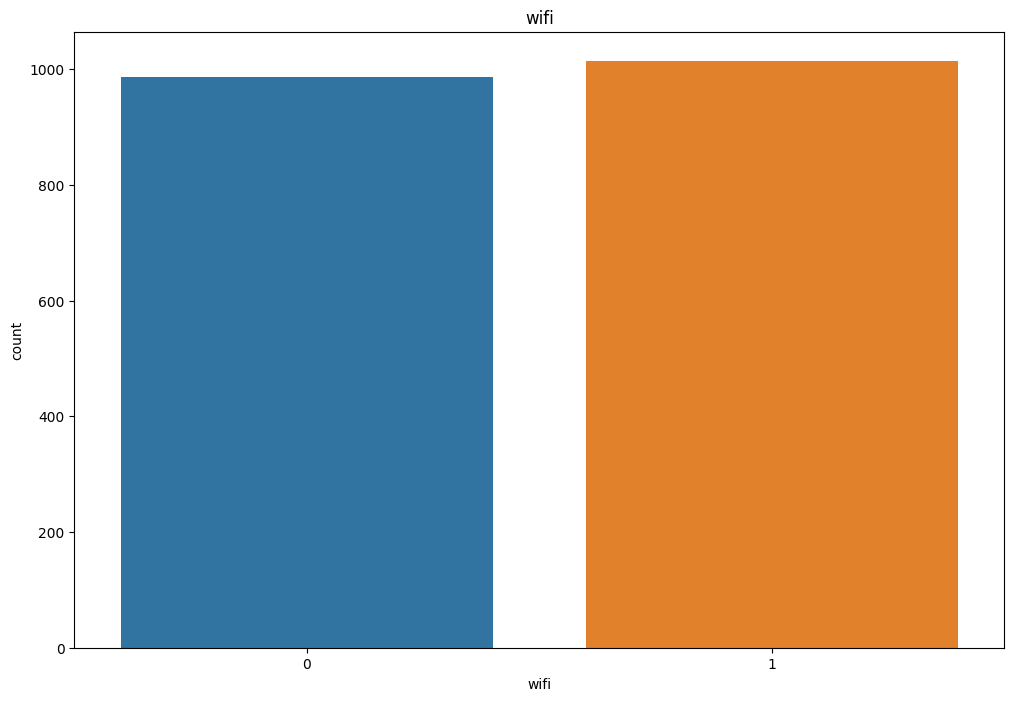

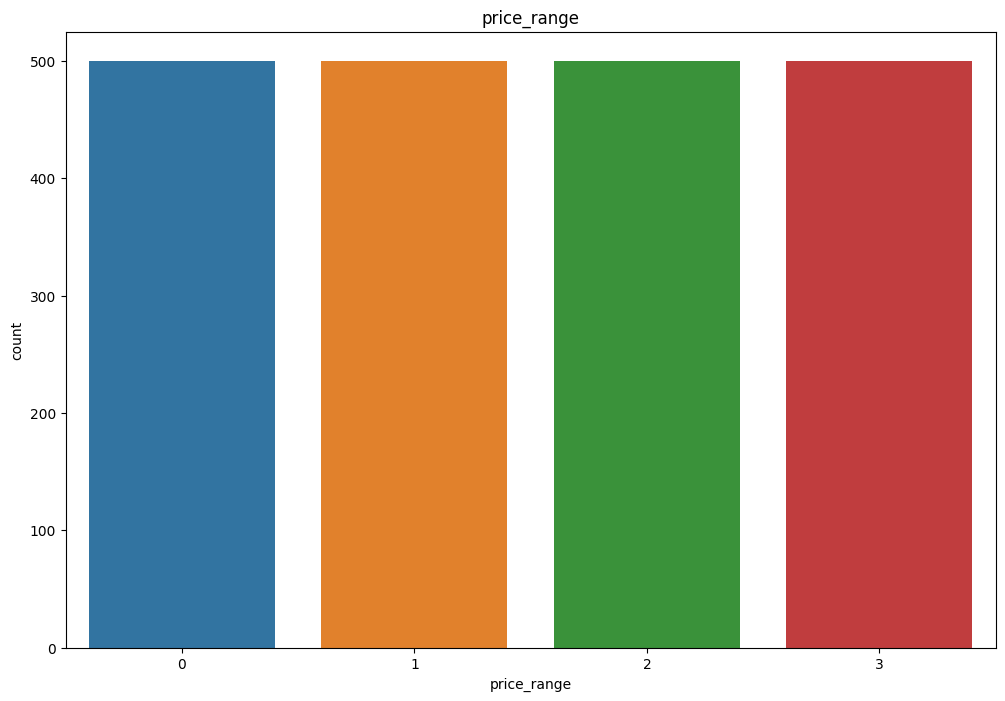

In [ ]:
for i in train_cat.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i,data=train_cat)
    plt.title(i)
    plt.show()

In [ ]:
# variables numericas
train_num=train[num_features]
train_num

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
0,842,7,188,20,756,2549
1,1021,53,136,905,1988,2631
2,563,41,145,1263,1716,2603
3,615,10,131,1216,1786,2769
4,1821,44,141,1208,1212,1411
...,...,...,...,...,...,...
1995,794,2,106,1222,1890,668
1996,1965,39,187,915,1965,2032
1997,1911,36,108,868,1632,3057
1998,1512,46,145,336,670,869


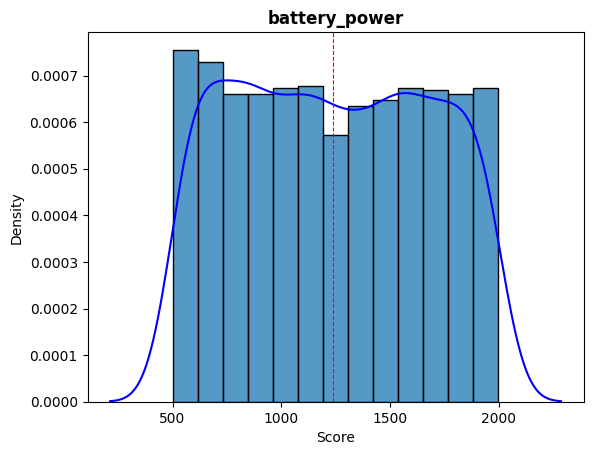

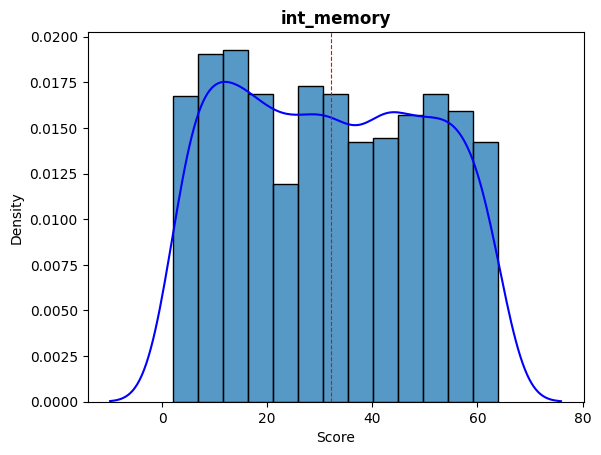

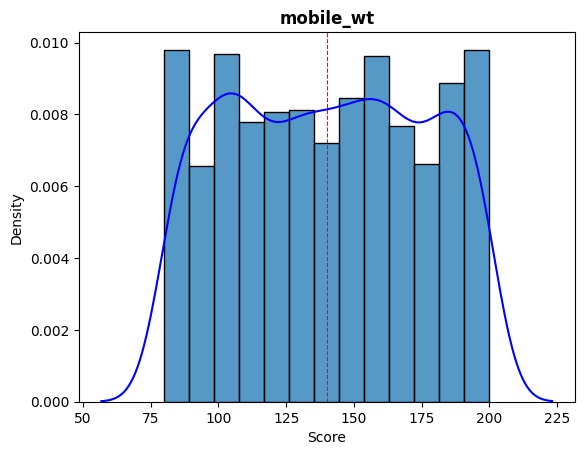

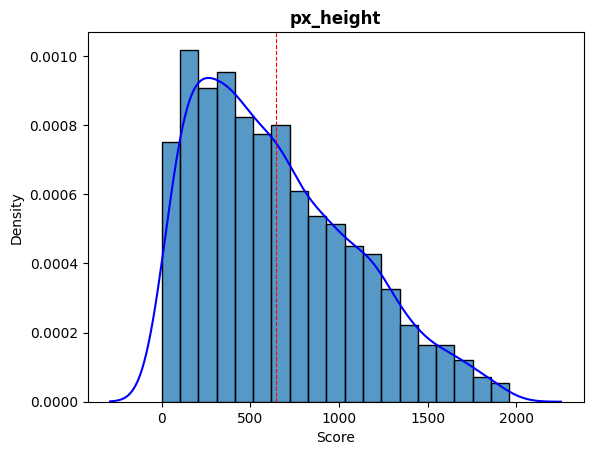

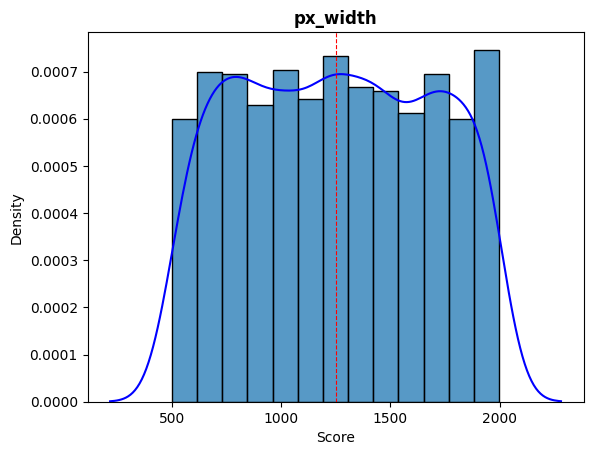

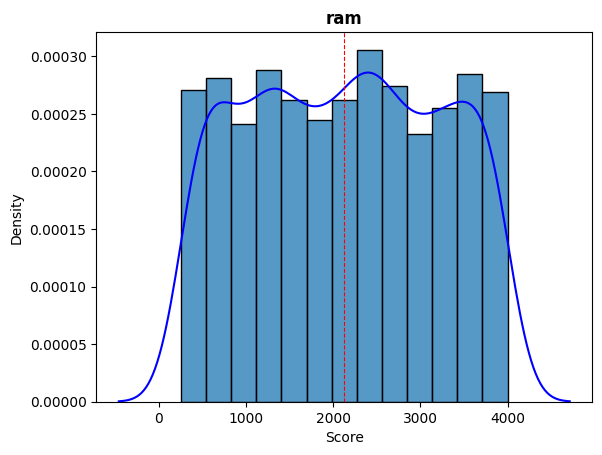

In [ ]:
for i in train_num.columns:
  sns.histplot(train_num[i],stat='density')
  sns.kdeplot(train_num[i], color='blue')
  plt.axvline(train_num[i].mean(), color='red', linestyle='--', linewidth=0.8)
  plt.title(i,fontsize=12,weight='bold')
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

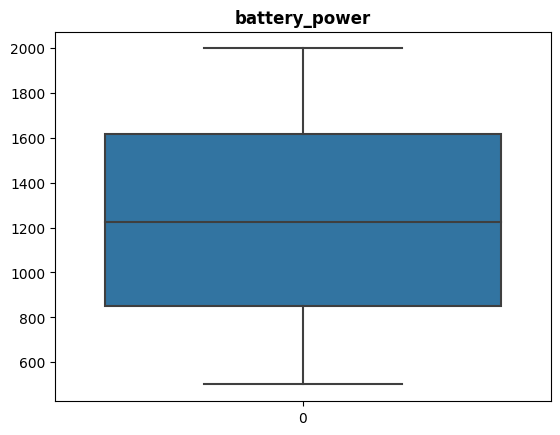

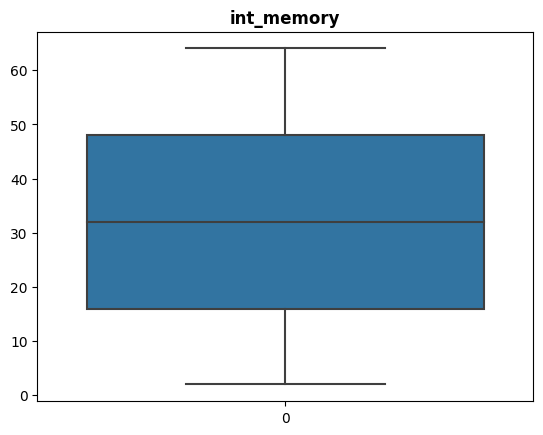

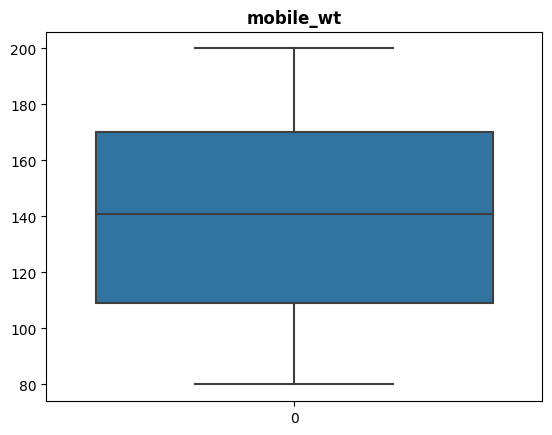

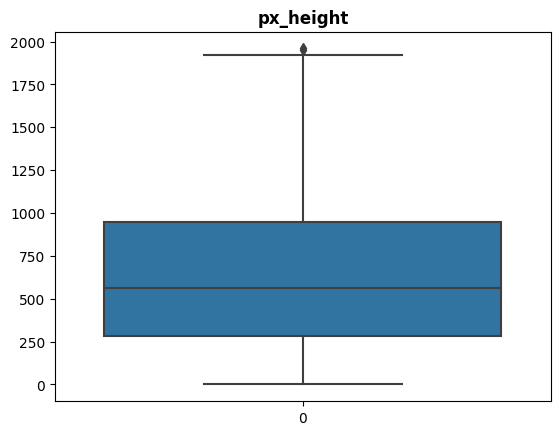

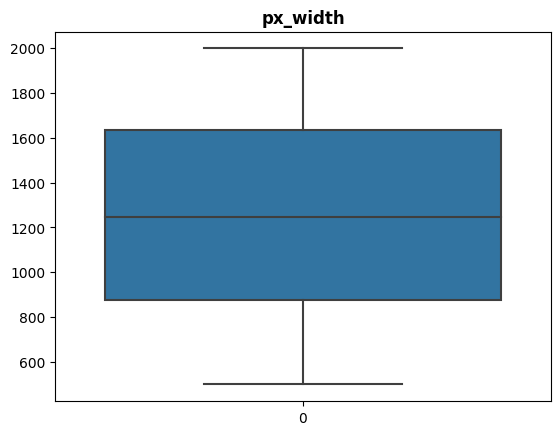

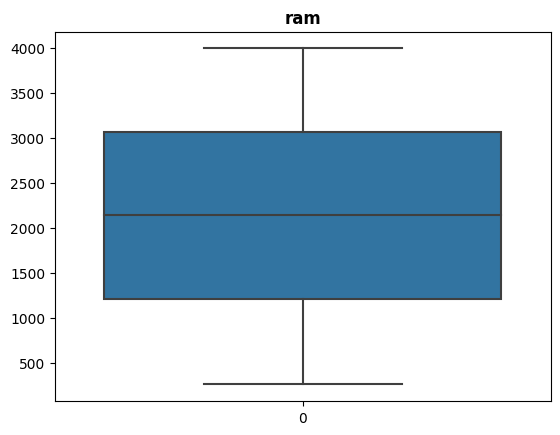

In [ ]:
for i in train_num.columns:
  sns.boxplot(train_num[i])
  plt.title(i,fontsize=12,weight='bold')
  plt.show()

In [ ]:
correlation = train.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')


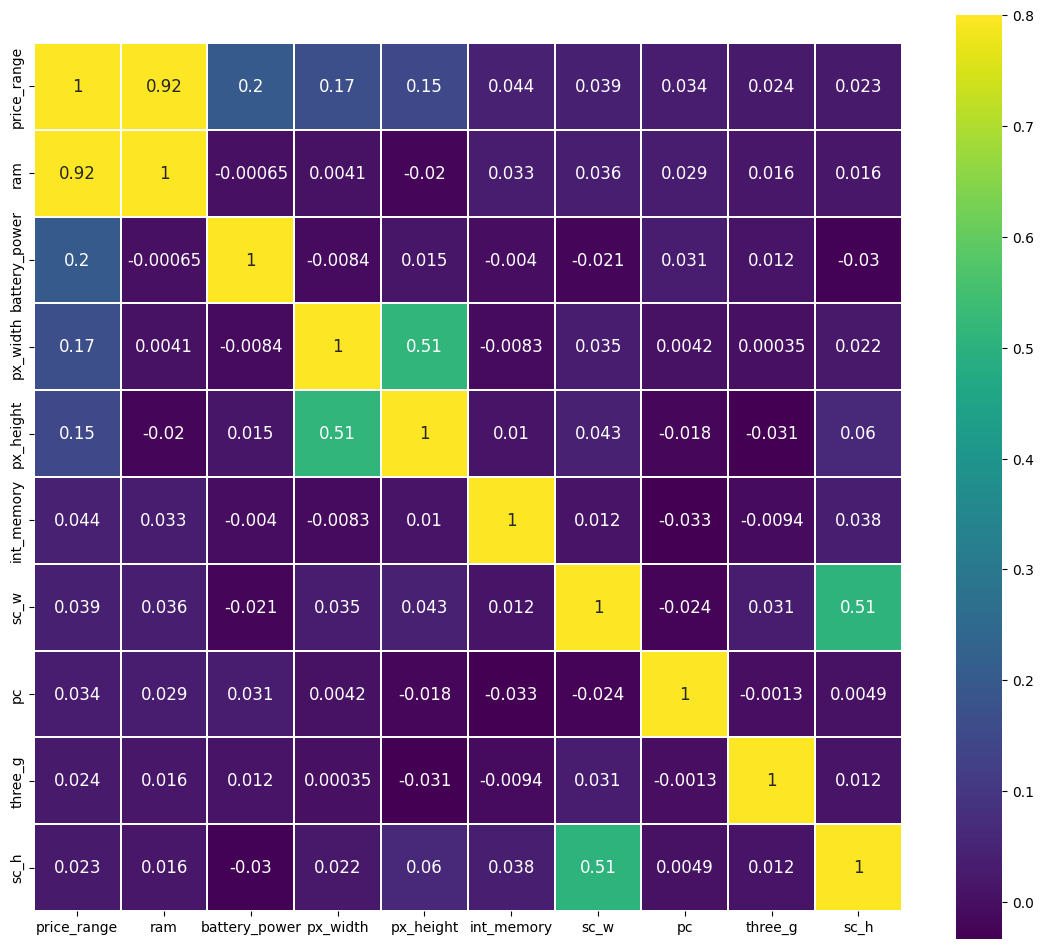

In [ ]:
k= 10
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

* Existe una fuerte correlación entre la capacidad de almacenamiento y la categoría de precio, así como entre los tamaños de teléfono. Por tanto, podemos concluir que con un aumento en la cantidad de memoria del teléfono, su coste también aumentará.

* Porque como no nos enfrentamos a la tarea de mejorar la calidad del modelo, no tiene sentido codificar variables. Como regla general, si una característica categórica tiene menos de 5 características, entonces tiene sentido codificarla usando el método OneHotEncoding, mientras que el resto de las características se pueden codificar con OrdinalEncoding. También para variables cuantitativas, se puede realizar un escalado dentro de los límites de [0,1]. Este proceso hipotéticamente mejorará el modelo del 1 al 5%.

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss

In [ ]:
X=train.drop('price_range',axis=1)
y=train['price_range']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [ ]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       135
           1       0.83      0.81      0.82       123
           2       0.80      0.82      0.81       118
           3       0.94      0.94      0.94       124

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.31      0.21      0.25       135
           1       0.24      0.74      0.36       123
           2       0.12      0.02      0.03       118
           3       0.20      0.02      0.03       124

    accuracy                           0.25       500
   macro avg       0.22      0.25      0.17       500
weighted avg       0.22      0.25      0.17       500

------------------------------ 

mo

## **Hyperparametros**

**Ramndon Forest**

In [ ]:
rfc=RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators':[50,100,150,200],
    'max_depth': [None,2,5,6,10,15,20],
    'max_features':['sqrt','log2',None]
}
# perform a grid search
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': 15, 'max_features': None, 'n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=100,max_features=None,n_estimators=100,max_depth=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=None, random_state=100)

In [ ]:
y_pred=rfc.predict(X_test)
print('Acurracy Score', round(accuracy_score(y_test,y_pred)*100,2), "%")

Acurracy Score 87.0 %


In [ ]:
print('F-1 Score: ',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score: ',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score: ',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score: ', (jaccard_score(y_test,y_pred,average='micro')))

F-1 Score:  0.87
Precision Score:  0.87
Recall Score:  0.87
Jaccard Score:  0.7699115044247787


In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":rfc.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)


,Feature Name,Importance
13,ram,0.621084
0,battery_power,0.136129
11,px_height,0.093837
12,px_width,0.069091
8,mobile_wt,0.014026
6,int_memory,0.009187
10,pc,0.007393
14,sc_h,0.006896
16,talk_time,0.006598
4,fc,0.006500


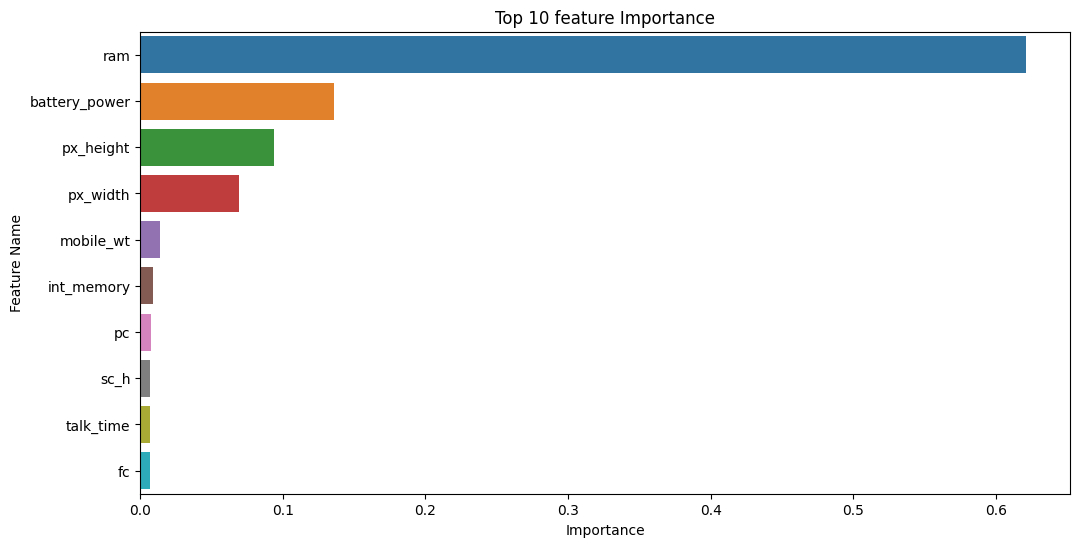

In [ ]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()


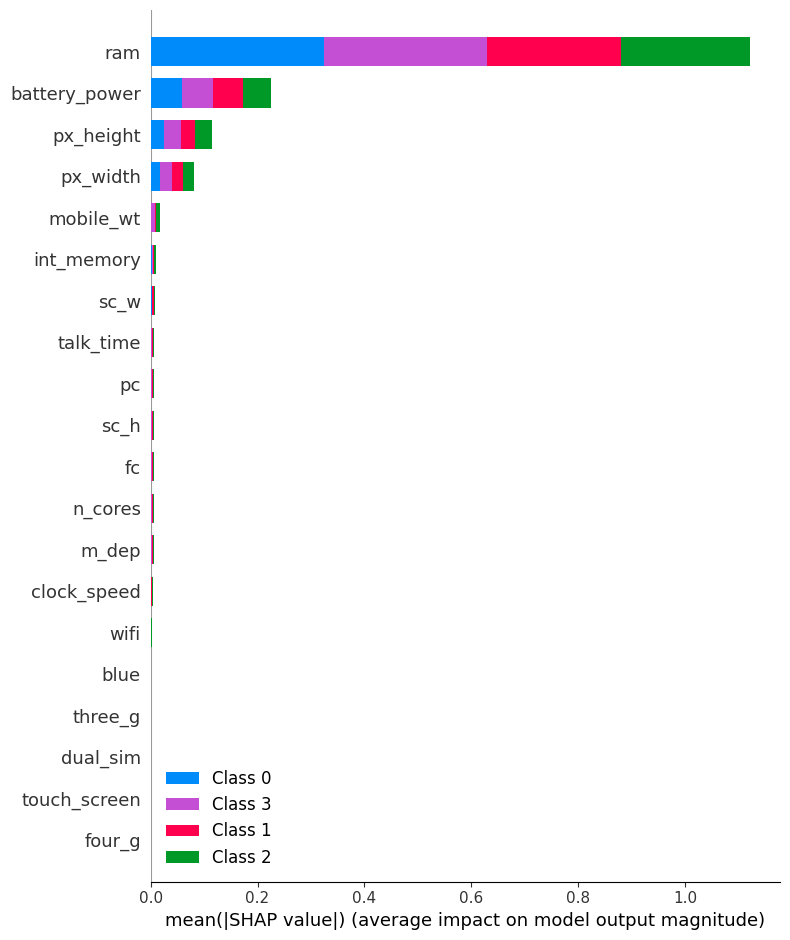

In [ ]:
def modelo(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values,X_test)

modelo(rfc)

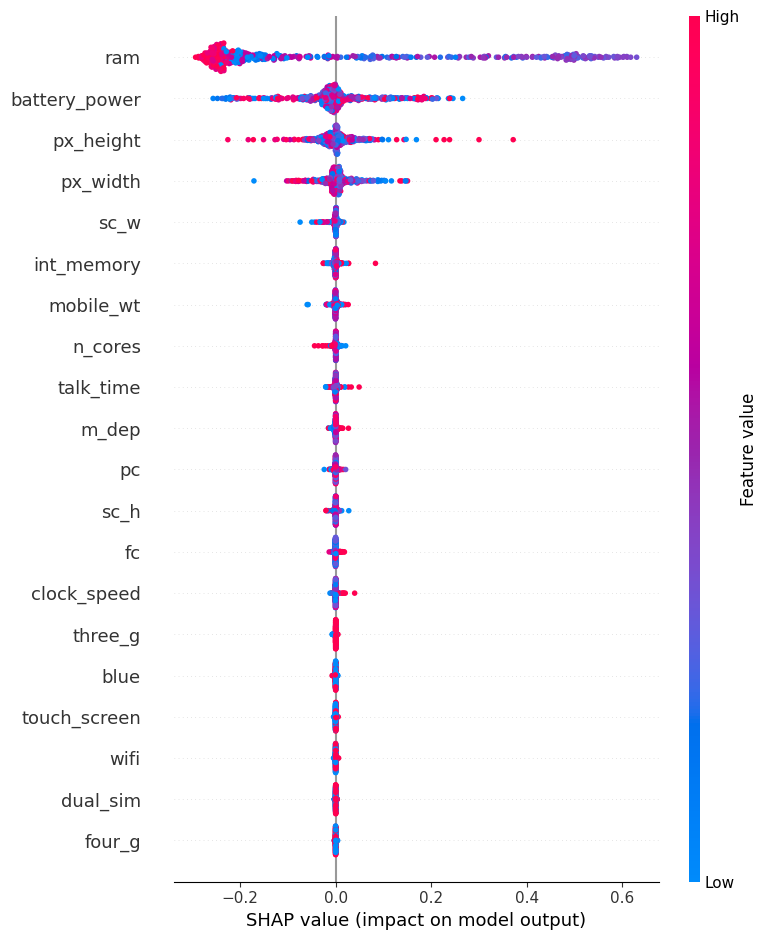

In [ ]:

def modelo_shap(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)
modelo_shap(rfc)

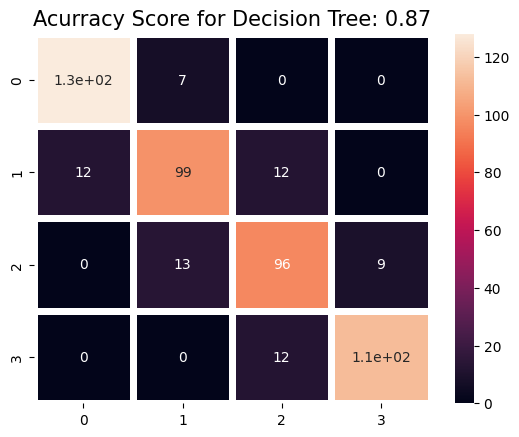

In [ ]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(rfc)

**KNeighborsClassifier**

In [ ]:
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors':[5,6,7,8,9,10,12,15,20],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2],
    'weights':['uniform','distance'],
    'metric_params':['dict',None]
}
# perform a grid search
grid_search=GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'algorithm': 'ball_tree', 'metric_params': None, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [ ]:
knn=KNeighborsClassifier(algorithm='ball_tree', metric_params=None, n_neighbors= 9, p= 2, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [ ]:
y_pred=knn.predict(X_test)
print('Acurracy Score',round(accuracy_score(y_test,y_pred)*100,2),"%")

Acurracy Score 92.4 %


In [ ]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')

# Crear un diccionario con los resultados
data = {
    'Métricas': ['Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score', 'Jaccard Score'],
    'Resultados': [accuracy, f1, precision, recall, jaccard]
}

# Crear un DataFrame de pandas a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Métricas,Resultados
0,Accuracy Score,92.400000
1,F1 Score,0.924000
2,Precision Score,0.924000
3,Recall Score,0.924000
4,Jaccard Score,0.858736


**SVC**

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=100)
svc=SVC()
param_grid={
    ##'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale','auto'],
    'degree':[1,2,3],
    'class_weight':['dict','balanced'],
    'decision_function_shape':['ovo', 'ovr']
}
grid_search=GridSearchCV(svc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)


{'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale'}


In [ ]:
svc=SVC(class_weight='balanced', decision_function_shape='ovo', degree=1, gamma='scale')
svc.fit(X_train,y_train)

SVC(class_weight='balanced', decision_function_shape='ovo', degree=1)

In [ ]:
y_pred=svc.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')

# Crear un diccionario con los resultados
data = {
    'Métricas': ['Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score', 'Jaccard Score'],
    'Resultados': [accuracy, f1, precision, recall, jaccard]
}

# Crear un DataFrame de pandas a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Métricas,Resultados
0,Accuracy Score,95.000000
1,F1 Score,0.950000
2,Precision Score,0.950000
3,Recall Score,0.950000
4,Jaccard Score,0.904762


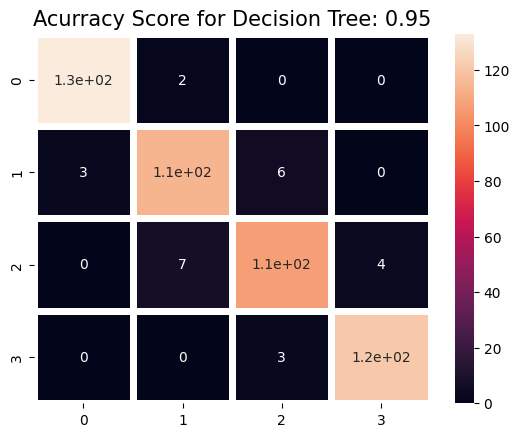

In [ ]:
matrix(svc)

**LogisticRegression**

In [ ]:
lr=LogisticRegression()
param_grid={
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l1', 'l2', 'elasticnet', None],
    'class_weight':['dict','balanced',None],
    'C':[1,2,3,4,5],
    'max_iter':[10,25,50,75,100]
}
grid_search=GridSearchCV(lr,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)


{'C': 3, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr=LogisticRegression(C=3, class_weight='balanced', max_iter=100, penalty='l2', solver='newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(C=3, class_weight='balanced', solver='newton-cg')

In [ ]:
y_pred=lr.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')

# Crear un diccionario con los resultados
data = {
    'Métricas': ['Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score', 'Jaccard Score'],
    'Resultados': [accuracy, f1, precision, recall, jaccard]
}

# Crear un DataFrame de pandas a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Métricas,Resultados
0,Accuracy Score,95.800000
1,F1 Score,0.958000
2,Precision Score,0.958000
3,Recall Score,0.958000
4,Jaccard Score,0.919386


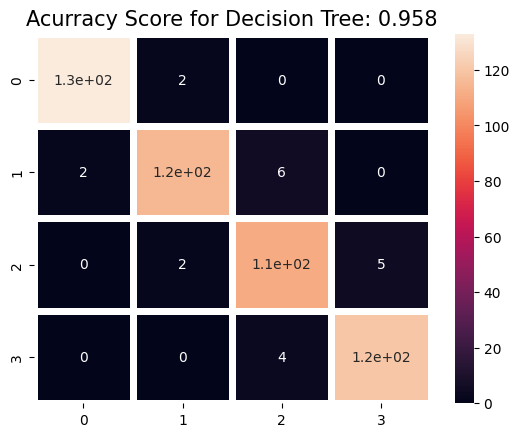

In [ ]:
matrix(lr)